## **Hand Written Digit Prediction - Classification Analysis**

**The digits dataset consist of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image repesents**

## **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


## **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

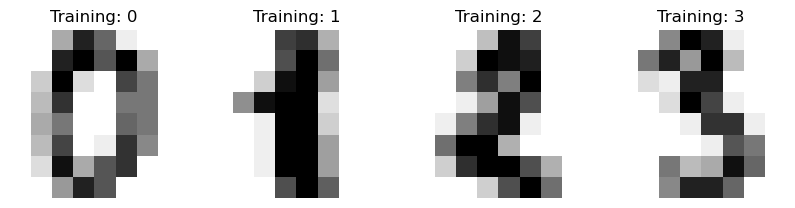

In [ ]:
_, axes = plt.subplots(nrows=1, ncols =4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## **Data Preprocessing**


**Flatten Image**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

##**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **Predict Test Data**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([2, 4, 1, 2, 5, 0, 9, 9, 1, 5, 7, 2, 2, 2, 8, 2, 1, 1, 1, 9, 6, 8,
       1, 6, 9, 8, 8, 7, 4, 5, 1, 4, 6, 9, 7, 6, 5, 5, 9, 7, 1, 0, 1, 4,
       5, 0, 3, 0, 1, 0, 9, 9, 9, 8, 0, 3, 1, 3, 8, 4, 4, 9, 9, 5, 3, 1,
       9, 7, 4, 2, 5, 1, 2, 9, 3, 8, 9, 9, 5, 7, 7, 4, 5, 0, 6, 3, 4, 5,
       3, 3, 7, 3, 6, 6, 6, 1, 2, 8, 0, 8, 5, 5, 5, 3, 9, 8, 1, 3, 0, 9,
       0, 7, 6, 2, 1, 7, 5, 9, 4, 5, 7, 2, 0, 8, 3, 6, 1, 0, 0, 8, 7, 1,
       2, 5, 5, 8, 0, 2, 1, 0, 0, 3, 7, 1, 1, 8, 3, 7, 0, 2, 4, 0, 7, 3,
       2, 4, 2, 4, 9, 0, 6, 0, 9, 6, 5, 6, 3, 8, 7, 8, 8, 1, 2, 9, 5, 9,
       5, 7, 5, 1, 4, 8, 8, 6, 1, 8, 3, 6, 7, 8, 2, 9, 9, 6, 0, 0, 4, 0,
       6, 6, 6, 4, 4, 4, 0, 8, 3, 9, 7, 8, 9, 5, 2, 8, 5, 9, 2, 7, 9, 6,
       9, 0, 5, 5, 3, 8, 6, 9, 3, 6, 6, 4, 7, 7, 6, 8, 9, 3, 7, 4, 0, 1,
       5, 0, 9, 3, 1, 0, 9, 3, 8, 1, 1, 7, 3, 7, 9, 5, 0, 0, 3, 9, 1, 6,
       4, 1, 3, 2, 0, 7, 3, 2, 3, 5, 4, 1, 2, 6, 8, 4, 2, 1, 3, 9, 8, 6,
       5, 2, 9, 6, 1, 2, 5, 7, 9, 4, 1, 1, 5, 4, 9,

## **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  1, 45,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 59]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.98      0.96        54
           2       1.00      1.00      1.00        55
           3       0.96      0.96      0.96        54
           4       0.98      0.98      0.98        57
           5       0.96      1.00      0.98        51
           6       1.00      0.96      0.98        54
           7       0.98      1.00      0.99        49
           8       0.96      0.90      0.93        50
           9       0.97      0.97      0.97        61

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Explanation**

***The "Handwritten Digit Prediction - Classification Analysis" project involves collecting and preprocessing a dataset of handwritten digit images, training a machine learning model using techniques like convolutional neural networks, evaluating the model's performance, and deploying it for practical use. The goal is to create a robust system that can accurately recognize and classify handwritten digits, enabling a wide range of applications in fields such as character recognition, digit-based data entry, and more.***

1.Collect a dataset of handwritten digit images.

2.Preprocess the images by resizing, converting to grayscale, and applying normalization and denoising techniques.
Split the dataset into a training set and a testing set.

3.Train a machine learning model, such as a convolutional neural network (CNN), on the training set.

4.Utilize cross-validation, regularization, and hyperparameter tuning to optimize the model's performance.

5.Evaluate the model's accuracy on the testing set and measure its performance using metrics like precision, recall, and F1 score.

6.Deploy the trained model into a production environment for real-time handwritten digit prediction.

7.Integrate the model into a software system or create a user-friendly interface for users to input handwritten digits and receive accurate predictions.

8.The ultimate goal is to create a robust system that accurately recognizes and classifies handwritten digits, enabling applications in character recognition and digit-based data entry.